In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
! pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# **Split Dataset 1**

In [ ]:
! pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Project/datasettttttt"
output = "/content/drive/MyDrive/Project/dataset_coba3" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 300 files [02:25,  2.06 files/s]


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Project/dataset_coba3/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Project/dataset_coba3/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


# **Split Dataset 2**

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Project/datasettttttt",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

val_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Project/datasettttttt",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

In [ ]:
#titip fadhil

train_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Project Capstone/datasettttttt",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

val_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Project Capstone/datasettttttt",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 300 files belonging to 6 classes.
Using 240 files for training.
Found 300 files belonging to 6 classes.
Using 60 files for validation.


# **NEW**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (224,224,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6)   #Adding the Output Layer
])

In [ ]:
#pake ini
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_data,
          validation_data=val_data,
          epochs=14)

Epoch 1/14
8/8 [==============================] - 24s 2s/step - loss: 1.8241 - accuracy: 0.1708 - val_loss: 1.7705 - val_accuracy: 0.1667
Epoch 2/14
8/8 [==============================] - 22s 2s/step - loss: 1.7130 - accuracy: 0.1667 - val_loss: 1.7068 - val_accuracy: 0.1667
Epoch 3/14
8/8 [==============================] - 22s 2s/step - loss: 1.6082 - accuracy: 0.3125 - val_loss: 1.6209 - val_accuracy: 0.3167
Epoch 4/14
8/8 [==============================] - 22s 2s/step - loss: 1.4686 - accuracy: 0.4417 - val_loss: 1.6619 - val_accuracy: 0.3333
Epoch 5/14
8/8 [==============================] - 22s 2s/step - loss: 1.2827 - accuracy: 0.5250 - val_loss: 1.4791 - val_accuracy: 0.4167
Epoch 6/14
8/8 [==============================] - 25s 3s/step - loss: 1.1416 - accuracy: 0.6167 - val_loss: 1.6199 - val_accuracy: 0.3167
Epoch 7/14
8/8 [==============================] - 25s 3s/step - loss: 1.0475 - accuracy: 0.6292 - val_loss: 1.6522 - val_accuracy: 0.3000
Epoch 8/14
8/8 [==================

In [ ]:
model.save('/content/drive/MyDrive/Project_Bismillah/Saved_model')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# **Model 5**

In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (224,224,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6)   #Adding the Output Layer
])

In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

In [ ]:
#pake ini
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model5.fit(train_data,
          validation_data=val_data,
          epochs=14)

Epoch 1/14
8/8 [==============================] - 72s 3s/step - loss: 1.8321 - accuracy: 0.1417 - val_loss: 1.7530 - val_accuracy: 0.1667
Epoch 2/14
8/8 [==============================] - 13s 1s/step - loss: 1.7200 - accuracy: 0.1875 - val_loss: 1.6826 - val_accuracy: 0.3667
Epoch 3/14
8/8 [==============================] - 12s 1s/step - loss: 1.5779 - accuracy: 0.3292 - val_loss: 1.5090 - val_accuracy: 0.3500
Epoch 4/14
8/8 [==============================] - 12s 1s/step - loss: 1.3445 - accuracy: 0.4625 - val_loss: 1.4383 - val_accuracy: 0.5333
Epoch 5/14
8/8 [==============================] - 12s 1s/step - loss: 1.2854 - accuracy: 0.4708 - val_loss: 1.4401 - val_accuracy: 0.4000
Epoch 6/14
8/8 [==============================] - 16s 1s/step - loss: 1.1238 - accuracy: 0.6417 - val_loss: 1.4299 - val_accuracy: 0.3833
Epoch 7/14
8/8 [==============================] - 13s 1s/step - loss: 0.9598 - accuracy: 0.6792 - val_loss: 1.4191 - val_accuracy: 0.3833
Epoch 8/14
8/8 [==================

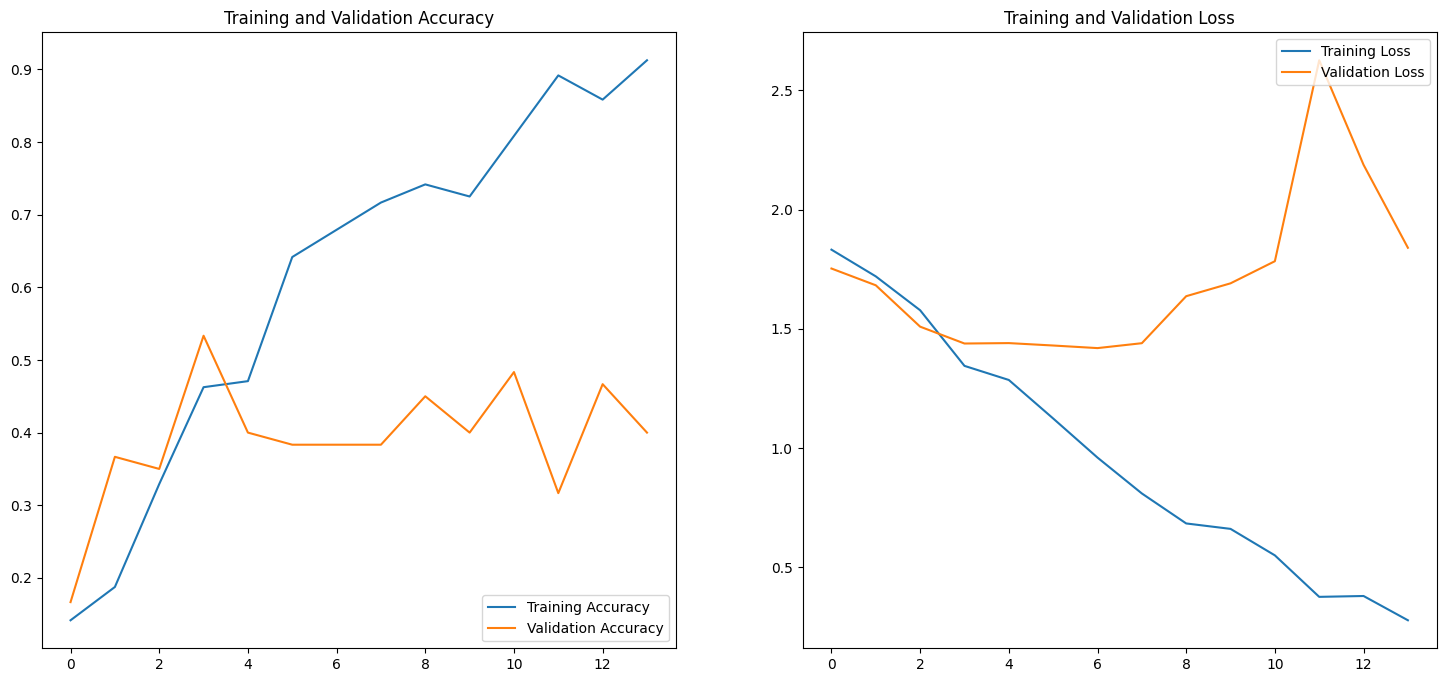

In [ ]:
#check grafik
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 14
epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model5.save('/content/drive/MyDrive/Project_Bismillah/Model 5 FIX/Saved_model5')

In [ ]:
from tensorflow import keras
model5 = keras.models.load_model('/content/drive/MyDrive/Project_Bismillah/Model 5 FIX/Saved_model5')

In [ ]:
# serialize model to JSON
model_json = model5.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model5.save_weights("model5.h5")
print("Saved model to disk")

Saved model to disk


# **Model 6**

In [ ]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(16,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')   #Adding the Output Layer
])

In [ ]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model6.fit(train_data,
          validation_data=val_data,
          epochs=15)

Epoch 1/15
8/8 [==============================] - 22s 2s/step - loss: 1.8242 - accuracy: 0.1667 - val_loss: 1.7335 - val_accuracy: 0.1000
Epoch 2/15
8/8 [==============================] - 21s 2s/step - loss: 1.6767 - accuracy: 0.2375 - val_loss: 1.6498 - val_accuracy: 0.1667
Epoch 3/15
8/8 [==============================] - 23s 2s/step - loss: 1.5048 - accuracy: 0.3292 - val_loss: 1.5308 - val_accuracy: 0.3500
Epoch 4/15
8/8 [==============================] - 22s 2s/step - loss: 1.2761 - accuracy: 0.5500 - val_loss: 1.5901 - val_accuracy: 0.4500
Epoch 5/15
8/8 [==============================] - 22s 2s/step - loss: 1.2067 - accuracy: 0.5458 - val_loss: 1.5582 - val_accuracy: 0.3000
Epoch 6/15
8/8 [==============================] - 20s 2s/step - loss: 1.1336 - accuracy: 0.5833 - val_loss: 1.4586 - val_accuracy: 0.4167
Epoch 7/15
8/8 [==============================] - 23s 2s/step - loss: 0.9121 - accuracy: 0.6500 - val_loss: 1.4582 - val_accuracy: 0.4833
Epoch 8/15
8/8 [==================

In [ ]:
model6.save('/content/drive/MyDrive/Project_Bismillah/Saved_model6')

In [ ]:
from tensorflow import keras
model6 = keras.models.load_model('/content/drive/MyDrive/Project_Bismillah/Saved_model')

In [ ]:
model6new = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(16,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')   #Adding the Output Layer
])

In [ ]:
model6new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model6new.fit(train_data,
          validation_data=val_data,
          epochs=14)

Epoch 1/14
8/8 [==============================] - 23s 2s/step - loss: 1.8306 - accuracy: 0.2125 - val_loss: 1.7209 - val_accuracy: 0.1833
Epoch 2/14
8/8 [==============================] - 23s 2s/step - loss: 1.6539 - accuracy: 0.2333 - val_loss: 1.5375 - val_accuracy: 0.2500
Epoch 3/14
8/8 [==============================] - 22s 2s/step - loss: 1.4173 - accuracy: 0.3458 - val_loss: 1.5158 - val_accuracy: 0.4833
Epoch 4/14
8/8 [==============================] - 22s 2s/step - loss: 1.4222 - accuracy: 0.4458 - val_loss: 1.8266 - val_accuracy: 0.3000
Epoch 5/14
8/8 [==============================] - 20s 2s/step - loss: 1.4259 - accuracy: 0.5000 - val_loss: 1.4007 - val_accuracy: 0.4333
Epoch 6/14
8/8 [==============================] - 22s 2s/step - loss: 1.2319 - accuracy: 0.5625 - val_loss: 1.3565 - val_accuracy: 0.4000
Epoch 7/14
8/8 [==============================] - 21s 2s/step - loss: 1.0747 - accuracy: 0.6500 - val_loss: 1.4639 - val_accuracy: 0.3667
Epoch 8/14
8/8 [==================

In [ ]:
model6new.save('/content/drive/MyDrive/Project_Bismillah/Saved_model6new')

In [ ]:
from tensorflow import keras
model6new = keras.models.load_model('/content/drive/MyDrive/Project_Bismillah/Saved_model6new')

# **Model 7**

In [ ]:
def get_defined_label(x):
    label_dict = {0:'Abstract', 1:'Fauvism', 2:'Fiber Art', 3:'Japanese', 4:'Pop Art', 5:'Romanticism'}
    for key, value in label_dict:
        if key == x:
            return value

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

base_model = InceptionResNetV2(
        input_shape=(224,224,3),
        weights='imagenet',
        include_top=False,
        pooling='avg'
    )
base_model.trainable = False

219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
print('Base Model Ouput Shape = {}'.format(base_model.output_shape))
last_output = base_model.output

Base Model Ouput Shape = (None, 1536)


In [ ]:
x = tf.keras.layers.Dropout(0.2)(last_output)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=6, activation='softmax')(x)

In [ ]:
model7 = tf.keras.Model( base_model.input, x)

In [ ]:
model7.compile(
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0002, momentum=0.9, centered=True),
        loss = ['categorical_crossentropy'],
        metrics = ['accuracy']
    )

In [ ]:
learning_rate_reduction =[
    ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=1,
        verbose=1,
        factor=0.25,
        min_lr=0.000003),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=5,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=True)]

In [ ]:
history = model7.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    #callbacks=[learning_rate_reduction]
    )

Epoch 1/20
8/8 [==============================] - 121s 15s/step - loss: 1.9414 - accuracy: 0.2167 - val_loss: 1.4037 - val_accuracy: 0.4833
Epoch 2/20
8/8 [==============================] - 69s 9s/step - loss: 1.4910 - accuracy: 0.4208 - val_loss: 1.2108 - val_accuracy: 0.5333
Epoch 3/20
8/8 [==============================] - 69s 9s/step - loss: 1.0577 - accuracy: 0.5792 - val_loss: 0.9137 - val_accuracy: 0.6500
Epoch 4/20
8/8 [==============================] - 68s 9s/step - loss: 0.9895 - accuracy: 0.6417 - val_loss: 0.7566 - val_accuracy: 0.6833
Epoch 5/20
8/8 [==============================] - 68s 9s/step - loss: 0.7397 - accuracy: 0.7292 - val_loss: 0.8915 - val_accuracy: 0.6167
Epoch 6/20
8/8 [==============================] - 70s 9s/step - loss: 0.7228 - accuracy: 0.7167 - val_loss: 0.6975 - val_accuracy: 0.7000
Epoch 7/20
8/8 [==============================] - 68s 9s/step - loss: 0.6429 - accuracy: 0.7625 - val_loss: 0.8056 - val_accuracy: 0.7500
Epoch 8/20
8/8 [================

In [ ]:
model7.save('/content/drive/MyDrive/Project_Bismillah/Saved_model7')

In [ ]:
from tensorflow import keras
model7 = keras.models.load_model('/content/drive/MyDrive/Project_Bismillah/Saved_model7')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Project_Bismillah/Saved_model')

# **MODEL 8**

In [ ]:
def get_defined_label(x):
    label_dict = {0:'Abstract', 1:'Fauvism', 2:'Fiber Art', 3:'Japanese', 4:'Pop Art', 5:'Romanticism'}
    for key, value in label_dict:
        if key == x:
            return value

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

base_model = InceptionResNetV2(
        input_shape=(224,224,3),
        weights='imagenet',
        include_top=False,
        pooling='avg'
    )
base_model.trainable = False

In [ ]:
print('Base Model Ouput Shape = {}'.format(base_model.output_shape))
last_output = base_model.output

Base Model Ouput Shape = (None, 1536)


In [ ]:
x = tf.keras.layers.Dropout(0.2)(last_output)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=6, activation='softmax')(x)

In [ ]:
model8 = tf.keras.Model( base_model.input, x)

In [ ]:
model8.compile(
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0002, momentum=0.9, centered=True),
        loss = ['categorical_crossentropy'],
        metrics = ['accuracy']
    )

In [ ]:
learning_rate_reduction =[
    ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=1,
        verbose=1,
        factor=0.25,
        min_lr=0.000003),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=5,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=True)]

In [ ]:
history = model8.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction]
    )

Epoch 1/20
8/8 [==============================] - 73s 8s/step - loss: 2.0716 - accuracy: 0.1917 - val_loss: 1.7905 - val_accuracy: 0.2333 - lr: 2.0000e-04
Epoch 2/20
8/8 [==============================] - 70s 9s/step - loss: 1.6129 - accuracy: 0.4167 - val_loss: 1.0534 - val_accuracy: 0.5833 - lr: 2.0000e-04
Epoch 3/20
8/8 [==============================] - 69s 9s/step - loss: 1.2320 - accuracy: 0.5542 - val_loss: 0.9287 - val_accuracy: 0.6500 - lr: 2.0000e-04
Epoch 4/20
8/8 [==============================] - 60s 8s/step - loss: 0.8645 - accuracy: 0.6667 - val_loss: 0.8097 - val_accuracy: 0.6833 - lr: 2.0000e-04
Epoch 5/20
8/8 [==============================] - 68s 9s/step - loss: 0.9174 - accuracy: 0.6542 - val_loss: 0.7690 - val_accuracy: 0.7167 - lr: 2.0000e-04
Epoch 6/20
8/8 [==============================] - ETA: 0s - loss: 0.8277 - accuracy: 0.6875
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
8/8 [==============================] - 68s 9s/step - loss

In [ ]:
model8.save('/content/drive/MyDrive/Project_Bismillah/Saved_model8')

# **Export Model**

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model5, RPS_SAVED_MODEL)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['rescaling_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_rescaling_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 6)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-05-28 09:03:47.028363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'rescaling_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='rescaling_input')})
{'dense': TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense')}


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)

converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

tflite_model = converter.convert()
open("converted_model5.tflite", "wb").write(tflite_model)

836400

In [ ]:
tflite_model_file = 'converted_model5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

# **Image Classification**

In [ ]:
#with model 5
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  #Upload image
  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  #Predict image
  images = np.vstack([x])
  classes = model5.predict(images, batch_size=32)
  print(fn)
  print(classes)

Saving fauvism-art-13-3390358833_34_11zon.jpg to fauvism-art-13-3390358833_34_11zon.jpg
1/1 [==============================] - 0s 54ms/step
fauvism-art-13-3390358833_34_11zon.jpg
[[-1.1990626  1.0909023 -4.789871  -0.6117301 -3.9479823 -7.7607036]]


In [ ]:
classes[0]

In [ ]:
np.argmax(classes[0])

0

Abstract art is art that does not attempt to represent an accurate depiction of a visual reality but instead use shapes, colours, forms and gestural marks to achieve its effect


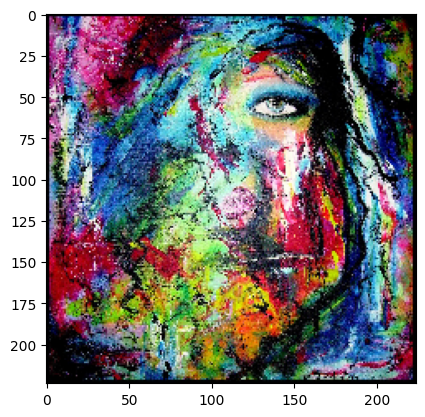

In [ ]:
plt.imshow(img)
if(np.argmax(classes[0])) == 0:
  print("Abstract art is art that does not attempt to represent an accurate depiction of a visual reality but instead use shapes, colours, forms and gestural marks to achieve its effect")
elif(np.argmax(classes[0])) == 1:
  print("Fauvism is the name applied to the work produced by a group of artists (which included Henri Matisse and André Derain) from around 1905 to 1910, which is characterised by strong colours and fierce brushwork.")
elif(np.argmax(classes[0])) == 2:
  print("Fiber art is a style of fine art which uses textiles such as fabric, yarn, and natural and synthetic fibers. It focuses on the materials and on the manual labor involved as part of its significance.")
elif(np.argmax(classes[0])) == 3:
  print("Japanese Art: Art from Japan from the Muromachi period (1392-1573) all the way to the Shōwa period (1926-1989)")
elif(np.argmax(classes[0])) == 4:
  print("Pop Art is: Popular (designed for a mass audience), Transient (short-term solution), Expendable (easily forgotten), Low cost, Mass produced, Young (aimed at youth), Witty, Sexy, Gimmicky, Glamorous, Big business")
else:
  print("Romanticism: Romanticism (also the Romantic era or the Romantic period) was an artistic, literary, musical and intellectual movement that originated in Europe toward the end of the 18th century and in most areas was at its peak in the approximate period from 1800 to 1850. Romanticism was characterized by its emphasis on emotion and individualism as well as glorification of all the past and nature, preferring the medieval rather than the classical.")

# **Related Images**

In [ ]:
! pip install DeepImageSearch -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00


In [ ]:
! pip install DeepImageSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from DeepImageSearch import Load_Data, Search_Setup

In [ ]:
# Load images from a folder
image_list = Load_Data().from_folder(['/content/drive/MyDrive/Project/dataset_coba'])

In [ ]:
image_list[:5]

['/content/drive/MyDrive/Project/dataset_coba/Pop Art/wp1826801-1339271610.JPG',
 '/content/drive/MyDrive/Project/dataset_coba/Pop Art/ead00b89bcc79b14e9f3fef4d05622f1-3895394776.JPG',
 '/content/drive/MyDrive/Project/dataset_coba/Pop Art/vector-modern-pop-art-1750182720.JPG',
 '/content/drive/MyDrive/Project/dataset_coba/Pop Art/IMG_5744-686563894.JPG',
 '/content/drive/MyDrive/Project/dataset_coba/Pop Art/G3-Andy-Warhol2+copy-3941274838.JPG']

In [ ]:
# Set up the search engine, You can load 'vit_base_patch16_224_in21k', 'resnet50' etc more then 500+ models
st = Search_Setup(image_list=image_list, model_name='vgg19', pretrained=True, image_count=100)

 Please Wait Model Is Loading or Downloading From Server!


 Model Loaded Successfully: vgg19


In [ ]:
# Index the images
st.run_index()

 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
yes


100%|██████████| 80/80 [01:38<00:00,  1.23s/it]


 Image Meta Information Saved: [metadata-files/vgg19/image_data_features.pkl]
 Saved The Indexed File:[metadata-files/vgg19/image_features_vectors.idx]


In [ ]:
# Get metadata
metadata = st.get_image_metadata_file()

In [ ]:
# Get similar images
st.get_similar_images(image_path='/content/drive/MyDrive/Project/dataset_coba/Abstract/6ryhn-1165693758.JPG', number_of_images=5)

{49: '/content/drive/MyDrive/Project/dataset_coba/Abstract/6ryhn-1165693758.JPG',
 42: '/content/drive/MyDrive/Project/dataset_coba/Abstract/b6be14328d7f6f28e5e8e64893a93549-859197344.JPG',
 44: '/content/drive/MyDrive/Project/dataset_coba/Abstract/7-598823407.JPG',
 55: '/content/drive/MyDrive/Project/dataset_coba/Abstract/pexels-photo-1070553-732578363.JPG',
 59: '/content/drive/MyDrive/Project/dataset_coba/Abstract/famous_abstract_art_painting_hd_2-1469201283 (1).jpg'}

In [ ]:
# Plot similar images
st.plot_similar_images(image_path='/content/drive/MyDrive/Project/dataset_coba/Abstract/04-women-expressionism-1349283850.JPG', number_of_images=5)

Output hidden; open in https://colab.research.google.com to view.